### 1. 載入套件

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras
import tensorflow as ts

Using TensorFlow backend.


### 2. 載入fashion資料

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 3. 初步認識資料

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


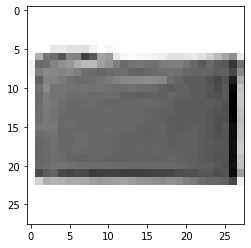

In [7]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

### 4. 資料前處理

In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
28*28

784

In [12]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train[20]

3

In [15]:
y_train =  to_categorical(y_train, 10) ##把資料改成one-hot-encoding的格式

In [16]:
y_test = to_categorical(y_test, 10)

### 5. 建置模型(各層神經元數量= 100, 100 , 10)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD 

In [18]:
model1 = Sequential()

In [19]:
model1.add(Dense(100, input_dim=784, activation="relu")) #設定神經元數量=100

In [20]:
model1.add(Dense(100, activation="relu")) #設定神經元數量=100

In [21]:
model1.add(Dense(10, activation="softmax")) #因為輸出有十種結果 所以神經元數量=10

In [22]:
model1.compile(loss='mse' , optimizer=SGD(lr=0.08) , metrics=['accuracy']) #設定lr=0.08

In [23]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model1.fit(x_train, y_train, batch_size=100, epochs=20) #訓練20次

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0755 - accuracy: 0.4441
Epoch 2/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0472 - accuracy: 0.6705
Epoch 3/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0393 - accuracy: 0.7293
Epoch 4/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0348 - accuracy: 0.7781
Epoch 5/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0316 - accuracy: 0.7965
Epoch 6/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0295 - accuracy: 0.8072
Epoch 7/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0280 - accuracy: 0.8150
Epoch 8/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0269 - accuracy: 0.8215
Epoch 9/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0260 - accuracy: 0.8257s - loss: 0.026

### 訓練結果

In [25]:
result = model1.predict_classes(x_test)

神經網路預測是: Sandal


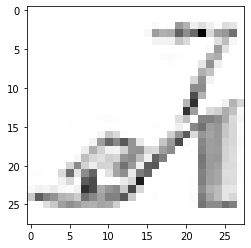

In [26]:
n = 5067
print('神經網路預測是:',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

### 做完第一個模型後，我在想如果減少神經元數量，對於訓練的準確率會不會有很大的影響?
### 於是我建置了第二個模型，將神經元數量減少一半，想看兩個模型訓練結果的差異。

### 6. 建置模型2 (各層神經元數量=50, 50, 10)

In [27]:
model2 = Sequential()

In [28]:
model2.add(Dense(50, input_dim=784, activation="relu"))

In [29]:
model2.add(Dense(50, activation="relu")) #設定神經元數量=100

In [30]:
model2.add(Dense(10, activation="softmax"))

In [31]:
model2.compile(loss='mse' , optimizer=SGD(lr=0.08) , metrics=['accuracy']) #設定lr=0.08

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [33]:
model2.fit(x_train, y_train, batch_size=100, epochs=20) #訓練20次

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0771 - accuracy: 0.4498
Epoch 2/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0478 - accuracy: 0.6627
Epoch 3/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0395 - accuracy: 0.7218
Epoch 4/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0350 - accuracy: 0.7686
Epoch 5/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0319 - accuracy: 0.7925
Epoch 6/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0299 - accuracy: 0.8052
Epoch 7/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0284 - accuracy: 0.8115
Epoch 8/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0273 - accuracy: 0.8177
Epoch 9/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0265 - accuracy: 0.8221
Epoch 10/20
60

### 訓練結果

In [34]:
result2 = model2.predict_classes(x_test)

神經網路預測是: Sandal


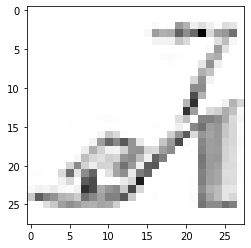

In [35]:
n = 5067
print('神經網路預測是:',class_names[result2[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

### 7. 比較model與model2

模型假設：
* activation、loss和optimizer都相同
* lr=0.08, batch_size=100, epochs=20 

model1三層的神經元數量分別為100、100、10

model2三層的神經元數量分別為50、50、10

model1訓練後的accuracy為0.8529

model2訓練後的accuracy為0.8485

兩者的accuracy差異很小

因此我們可以得知在其他條件不變的情況下

第一層與第二層都使用50個或100個神經元

對於訓練結果的accuracy沒有太大的差異